In [17]:
import matplotlib.pyplot as plt
import random

from ch08_gradient_descent import derivative
from ch08_gradient_descent import difference_quotient
from ch08_gradient_descent import gradient_step
from ch08_gradient_descent import square
from ch08_gradient_descent import sum_of_squares_gradient

## The Idea Behind Gradient Descent

The ***gradient*** (if you remember your calculus, this is the vector of partial derivatives) gives the input direction in which the function most quickly increases.

gradient = vector

Accordingly, one approach to maximizing a function is to pick a random starting point, compute the gradient, take a small step in the direction of the gradient (i.e., the direction that causes the function to increase the most), and repeat with the new starting point. Similarly, you can try to minimize a function by taking small steps in
the opposite direction.

## Estimating the Gradient

The ***derivative*** is the slope of the tangent line at *(x, f(x)*, while the ***difference quotient*** is the slope of the not-quite-tangent line that runs through the point *(x, f(x))* and point *(x + h, f(x + h))*. As *h* gets smaller and smaller, the not-quite-tangent line gets closer and closer to the tangent line.

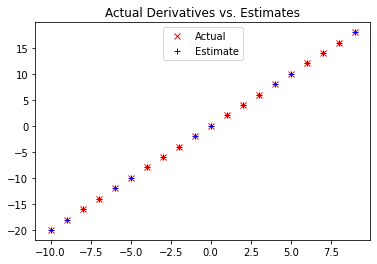

In [18]:
#
# plot actual and estimates for function f(x) = x**2 to show they're basically the same
#
# x-axis values
xs = range(-10, 10)
# y-axis values
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# graph as plot
plt.plot(xs, actuals, 'rx', label='Actual')       # red  x
plt.plot(xs, estimates, 'b+', label='Estimate')   # blue +

# add title, add legend, and show
plt.title("Actual Derivatives vs. Estimates")
plt.legend(loc=9)
plt.show()


## Using the Gradient

It’s easy to see that the sum_of_squares function is smallest when its input *v* is a vector of zeroes. But imagine we didn’t know that. Let’s use gradients to find the minimum among all three-dimensional vectors. We’ll just pick a random starting point and then take tiny steps in the opposite direction of the gradient until we reach a point where the gradient is very small:

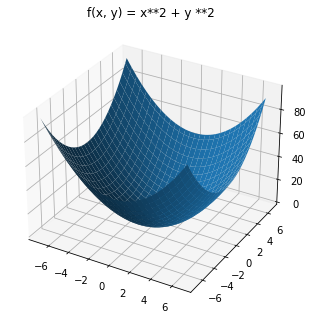

In [75]:
import matplotlib.pyplot as plt
#from matplotlib import cm
#from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.add(X**2, Y**2)
Z = R

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)

ax.set(title="f(x, y) = x**2 + y **2")
plt.show()

# how to scatter in 3 d
## https://pythonprogramming.net/matplotlib-3d-scatterplot-tutorial/
### https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [41]:
# pick a random starting point
# v0 = [random.uniform(-10, 10) for i in range(3)]
v0 = [random.randint(-10,10) for i in range(3)]
v = v0

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)    # compute the gradient at v
    v = gradient_step(v, grad, -0.01)    # take a negative gradient step
    # print(epoch, v)

print('random point in space v0:', v0)
print('minimum point found by the gradient descent method:', v)
print('distance from v to [0, 0, 0]:', distance(v, [0, 0, 0]))
assert distance(v, [0, 0, 0]) < 0.001    # v should be close to 0

random point in space v0: [2, -7, -3]
minimum point found by the gradient descent method: [3.3659347144319058e-09, -1.1780771500511704e-08, -5.048902071647866e-09]
distance from v to [0, 0, 0]: 1.3251698222423293e-08


In [33]:
# pick a random starting point
v0 = [random.randint(-10,10) for i in range(3)]
v = v0

tolerance = 0.0000001
#tolerance = 0.00000000000001

while True:
    gradient = sum_of_squares_gradient(v)       # compute the gradient at v
    next_v = gradient_step(v, gradient, -0.01)  # take a negative gradient step
    if distance(next_v, v) < tolerance:         # stop if we're converging
        break
    v = next_v                                  # continue if we're not

print('random point in space v0:', v0)
print('minimum point found by the gradient descent method:', v)
print('distance from v to [0, 0, 0]:', distance(v, [0, 0, 0]))
assert distance(v, [0, 0, 0]) < 0.001    # v should be close to 0

random point in space v0: [-1, 3, 9]
minimum point found by the gradient descent method: [-5.222400758641384e-07, 1.5667202275924157e-06, 4.700160682777249e-06]
distance from v to [0, 0, 0]: 4.981852809177617e-06
